# Train accident EDA

In [2]:
import sqlite3, csv
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

Load dataset:

Source:
https://safetydata.fra.dot.gov/officeofsafety/publicsite/on_the_fly_download.aspx

In [3]:
df = pd.read_csv("1512168151216412.csv")

In [191]:
df21 = pd.read_csv("/Users/alex/Downloads/2021_train_accidents.csv")

In [194]:
df20 = pd.read_csv("/Users/alex/Downloads/2020_train_accidents.csv")

In [195]:
df19 = pd.read_csv("/Users/alex/Downloads/2019_train_accidents.csv")

In [398]:
df_hwy = pd.read_csv("/Users/alex/Downloads/2022_Highway_Rail_Accidents.csv")

In [4]:
df = df.reset_index()
df = df.shift(periods=1, axis="columns")
cols = df.columns.tolist()
cs = pd.DataFrame(data = cols)
pd.set_option('display.max_columns', None)

In [399]:
df_hwy = df_hwy.reset_index()
df_hwy = df_hwy.shift(periods=1, axis="columns")

In [225]:
df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Columns: 146 entries, index to SUBDIV
dtypes: float64(32), int64(61), object(53)
memory usage: 2.4+ MB


In [ ]:
# 'INCDTNO': incident number
# 'INCDTNO2': incident number assigned by another involved railroad or entity
# 'INCDTNO3': incident number assigned by the railroad or entity responsible for track maintenance 
# 'ADJUNCT3': rail subdivision name
# 'SUBDIV' : city/town name
# Time is in central time!
# 'YEAR': Year of occurance
# 'MONTH': Month of occurance
# 'DAY': Day of occurance
# 'TIMEHR': Hour of occurance
# 'TIMEMIN': Minute of occurance


### Let us first explore the train companies involved. 

In [382]:
rr_counts = df.RAILROAD.value_counts()
total = rr_counts.sum()
# limit to 10 railroad companies
[print((str(round(100*(i/total),1))+'%'),j) for i,j in zip(rr_counts,rr_counts.index)]

27.7% UP
15.9% BNSF
14.5% NS
12.0% CSX
4.2% ATK
1.5% IC
1.3% KCS
1.2% FEC
1.1% WC
1.0% NJTR
0.9% MNCW
0.8% NIRC
0.7% LI
0.6% SEPA
0.5% BLF
0.5% MBTA
0.5% CRSH
0.5% CP
0.5% BRC
0.4% DGNO
0.4% IAIS
0.3% ALS
0.3% GRS
0.3% IHB
0.3% KAW
0.3% PTRA
0.3% LSRC
0.3% EIRR
0.3% AWRR
0.3% SJVR
0.3% GTW
0.3% PATH
0.2% SFRV
0.2% KCT
0.2% IORY
0.2% SKOL
0.2% SERA
0.2% RBMN
0.2% RCPE
0.2% WE
0.2% KRR
0.2% MRL
0.2% FWWR
0.2% TRRA
0.1% MACZ
0.1% WTA
0.1% GDLK
0.1% PW
0.1% UTAH
0.1% NICD
0.1% SLRG
0.1% TASD
0.1% AM
0.1% AZER
0.1% CFRC
0.1% SCXF
0.1% PCMZ
0.1% NYSW
0.1% NOPB
0.1% TPW
0.1% CAGY
0.1% LAS
0.1% DMVW
0.1% MNN
0.1% PGBX
0.1% MCRL
0.1% CDOT
0.1% GSWR
0.1% CIC
0.1% CC
0.1% IANR
0.1% URR
0.1% KYLE
0.1% RWRR
0.1% PHL
0.1% GRW
0.1% NYA
0.1% PAL
0.1% AGR
0.1% CWRY
0.1% SCAX
0.1% TXN
0.1% TMBL
0.1% ESPN
0.1% DL
0.1% IMRR
0.0% MCER
0.0% NECR
0.0% GWR
0.0% PCC
0.0% TCBR
0.0% BPRR
0.0% MNBR
0.0% RCRY
0.0% RVSC
0.0% FGA
0.0% AKMD
0.0% ARS
0.0% RALI
0.0% ACEX
0.0% ARZC
0.0% GNBC
0.0% RLAX
0.0% SGLR
0.0% PCJ

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

It makes sense to only look at the top 5 railroad companies, as these make up about 80 percent of all the accident records. These being: UP, BNSF, NS, CSX, and ATK. To be sure, we will also consider the net revenue to see if these figures accurately reflect these companies' presense in the US.

| Top 6 railroad companies|Revenue (in dollars)|Frequency in Dataset|
| --- | --- | --- |
|BNSF Railway (BNSF)|23.3 Billion|15.9%|
|Union Pacific Railroad (UP)|21.8 Billion|27.7%|
|CSX Transportation (CSX)|12.5 Billion|12%|
|Canadian National Railway (CN)|11.5 Billion|0%|
|Norfolk Southern Railway (NS)|11.14 Billion|14.5%|
|Amtrack (ATK)|2.1 Billion|4.16%|



It seems like there is close correlation, except that there is no data from Canadian National railway. Also, Amtrack
is significantly lower in revenue than the others, despite being in the top 5 in our dataset. Let's now explore the number of casualties by out top most common railroad companies.

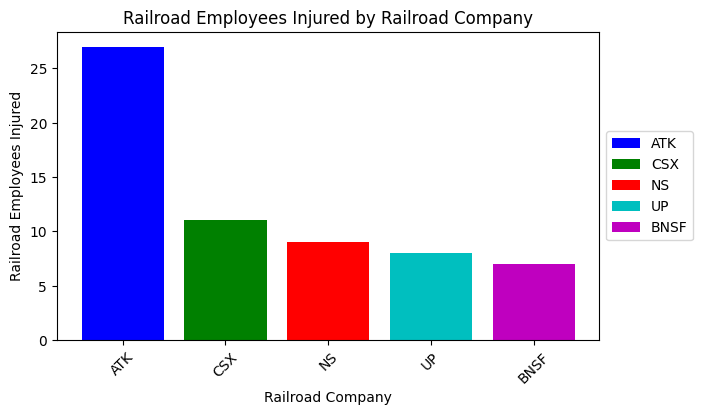

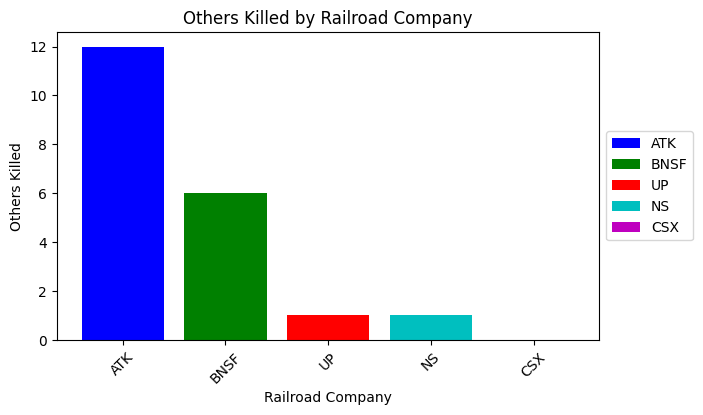

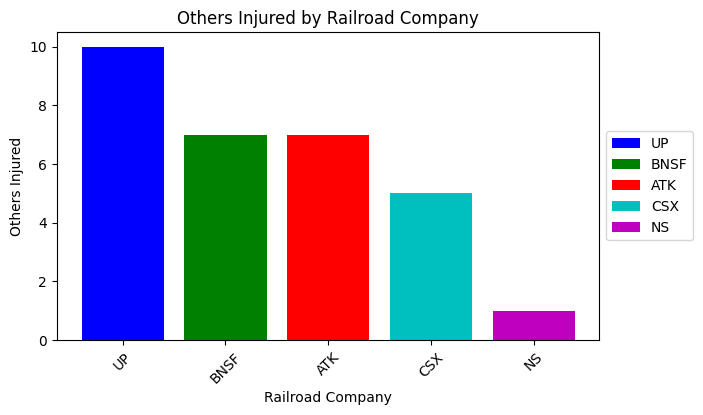

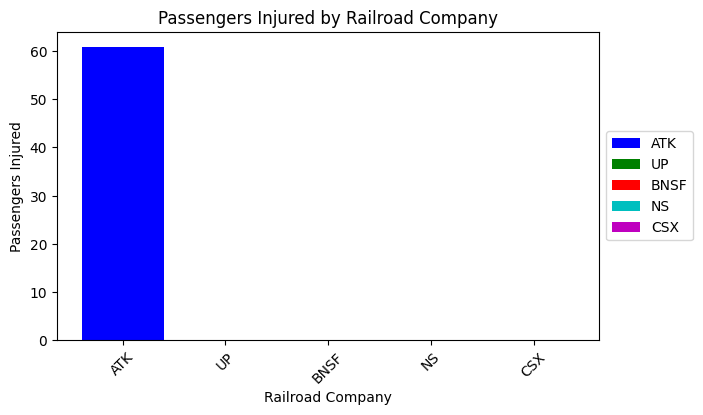

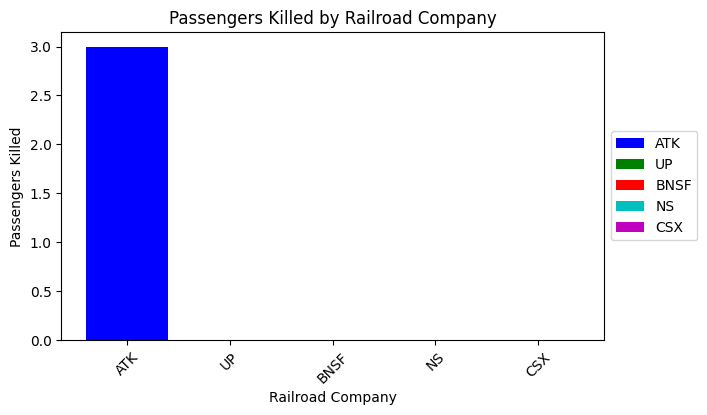

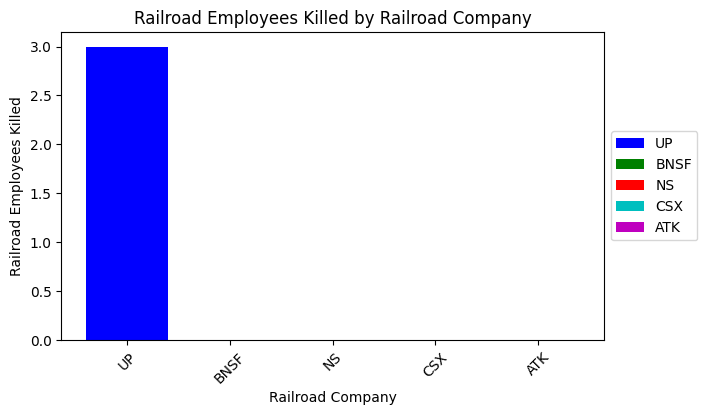

In [276]:
rr = df["RAILROAD"].value_counts()[:5].index.tolist()

for x in ["RREMPINJ","OTHERKLD","OTHERINJ","PASSINJ","PASSKLD","RREMPKLD"]:   
    empinj_cnt = {}

    for c,i in enumerate(rr):

        empinj_cnt[i] = df[df["RAILROAD"] == i][x].sum()

    empinj_cnt = dict(sorted(empinj_cnt.items(), key=lambda item: item[1], reverse = True))
    #print(empinj_cnt,'\n\n')

    plt.figure(figsize = [7,4])
    plt.bar(empinj_cnt.keys(), empinj_cnt.values(), color = ['b','g','r','c','m'], label = empinj_cnt.keys()) #,'y','k','wheat','plum','coral','grey','lime','olive','khaki','navy']
    plt.xticks(rotation = 45)
    rrc = "Railroad Company"
    plt.xlabel(rrc)
    l1 = "Railroad Employees Killed"
    l2 = "Railroad Employees Injured"
    l3 = "Passengers Killed"
    l4 = "Passengers Injured"
    l5 = "Others Killed"
    l6 = "Others Injured"
    
    if x == 'RREMPKLD':
        plt.title(l1+" by "+rrc)
        plt.ylabel(l1)
    if x == 'RREMPINJ':
        plt.title(l2+" by "+rrc)
        plt.ylabel(l2)
    if x == 'PASSKLD':
        plt.title(l3+" by "+rrc)
        plt.ylabel(l3)
    if x == 'PASSINJ':
        plt.title(l4+" by "+rrc)
        plt.ylabel(l4)
    if x == 'OTHERKLD':
        plt.title(l5+" by "+rrc)
        plt.ylabel(l5)
    if x == 'OTHERINJ':
        plt.title(l6+" by "+rrc)
        plt.ylabel(l6)
        
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It seems like Amtrack has a disproportionately large number of casualties. It has about twice as many railroad employees injured and "others" (not railroad employees or passangers) killed than CSX and BNSF, which come in second, respectively. Amtrack is also the only company to have passangers inured or killed, but this could be explained by the fact that it is the only passenger-only company out of all of these. Let us now see the proportion of passenger to non-passenger trains by company to be sure.

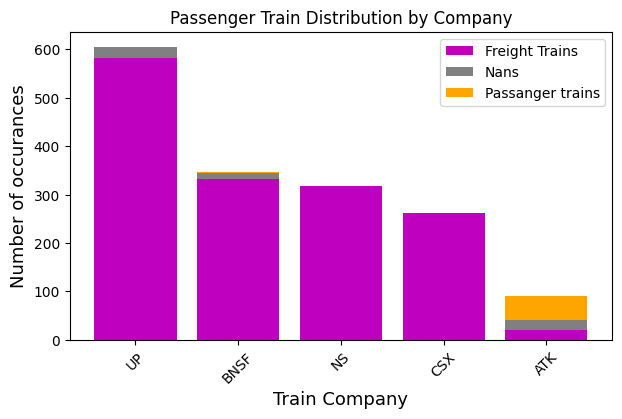

In [426]:
companies = df["RAILROAD"].value_counts()[:5].index.tolist()
pass_cnt_1 = []
npass_cnt_1 = []
nan_cnt_1 = []


for c,i in enumerate(companies):
    tot = len(df[df["RAILROAD"] == i])
    pass_cnt_1.append((df[df["RAILROAD"] == i]["PASSTRN"] == "Y").sum())
    npass_cnt_1.append((df[df["RAILROAD"] == i]["PASSTRN"] == "N").sum())
    nan_cnt_1.append(tot - pass_cnt_1[c] - npass_cnt_1[c])
    
plt.figure(figsize = [7,4]);
plt.bar(companies, npass_cnt_1, color = 'm', label = "Freight Trains");
plt.bar(companies, nan_cnt_1, bottom = npass_cnt_1, color = 'grey', label = "Nans");
plt.bar(companies, pass_cnt_1, bottom = (np.array(npass_cnt_1) + np.array(nan_cnt_1)), color = 'orange', label = "Passanger trains");
plt.xticks(rotation = 45);
plt.legend();
plt.title("Passenger Train Distribution by Company");
plt.xlabel("Train Company",fontsize = 13);
plt.ylabel("Number of occurances",fontsize = 13);

It does indeed seem to be the case that Amtrack is the only passenger train company in the top 5. Now is a good time to explore the causes for railroad accidents. 

Below is a description of Cause Codes.

Source: https://railroads.dot.gov/forms-guides-publications/guides/train-accident-cause-codes

Here, H codes are human factors, T are "Track,Roadbed, and structure", E are mechanical and electrical failures, S is signal communication, and M are miscellaneous. Let's create a pie chart that captures the breakdown of accidents by their category. 

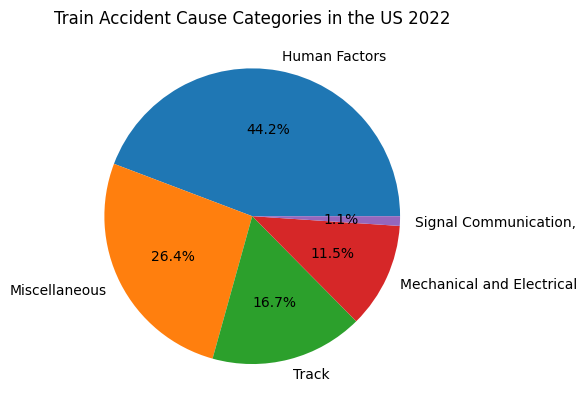

In [356]:
E_codes = 0
H_codes = 0
M_codes = 0
S_codes = 0
T_codes = 0

length = len(df["CAUSE"])

for i in df["CAUSE"]:
    if i[0] == "E":
        E_codes += 1
    if i[0] == "H":
        H_codes += 1
    if i[0] == "M":
        M_codes += 1
    if i[0] == "S":
        S_codes += 1
    if i[0] == "T":
        T_codes += 1

code_portions = [H_codes, M_codes, T_codes, E_codes, S_codes]

# Get the proportions of each code category
for c,i in enumerate(code_list):
    #print(code_list[c])# =
    code_list[c] = 100*(i/length)
    
#portions = [100*(i/rr_counts.sum()) for i in rr_counts.values[:10]]
#portions.append(100-np.array(portions).sum())
# RR company names
labels2 = ["Human Factors", "Miscellaneous", "Track", "Mechanical and Electrical", "Signal Communication,"]
# Create pie chart
fig, ax = plt.subplots()
ax.pie(code_portions, labels=labels2, autopct='%1.1f%%');
ax.set_title("Train Accident Cause Categories in the US 2022");

Human factors account for nearly half of these railroad accidents in US for the year 2022, with second leading reason being "Miscellaneous". Let us explore this a little further. We will now look at the top 15 leading causes, and take into account the passenger trains involved.

| Code|Description|Frequency in Dataset|
| --- | :--- | --- |
|**H307**|Shoving movement, man on or at leading end of movement, failure to control|5.2%|
|**H702**|Switch improperly lined|5.1%|
|**M302**|Highway user inattentiveness |4.0%|
|**H306**|Shoving movement, absence of man on or at leading end of movement|3.8%| 
|**H318**|Kicking or dropping cars, inadequate precautions|3.0%|
|**M411**|Passed couplers (automated classification yard)|2.9%|
|**M308**|Highway user deliberately disregarded crossing warning devices |2.7%|
|**H607**|Failure to comply with restricted speed|2.7%|
|**H312**|Passed couplers (other than automated classification yard)|2.6%|
|**T110**|Wide gage (due to defective or missing crossties)|2.1%|
|**M404**|Object or equipment on or fouling track |2.0%|
|**H704**|Switch previously run through |1.6%|
|**H503**|Buffing or slack action excessive, train handling|1.6%|
|**M303**|Highway user misjudgment under normal weather and traffic conditions|1.5%|
|**H302**|Cars left foul|1.5%|



Text(0, 0.5, 'Number of occurances')

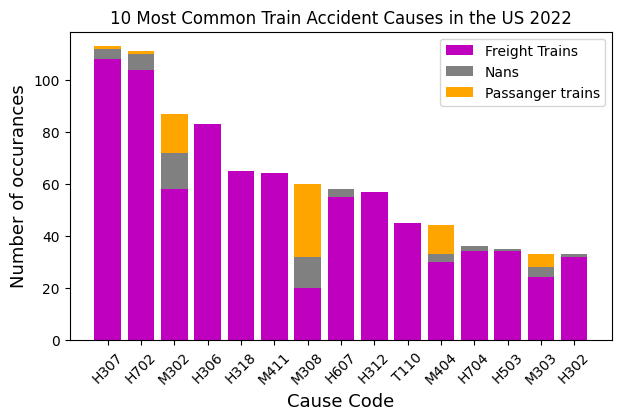

In [391]:
causes = df["CAUSE"].value_counts()[:15].index.tolist()
pass_cnt = []
npass_cnt = []
nan_cnt = []


for c,i in enumerate(causes):
    tot = len(df[df["CAUSE"] == i])
    pass_cnt.append((df[df["CAUSE"] == i]["PASSTRN"] == "Y").sum())
    npass_cnt.append((df[df["CAUSE"] == i]["PASSTRN"] == "N").sum())
    nan_cnt.append(tot - pass_cnt[c] - npass_cnt[c])
    

plt.figure(figsize = [7,4])
plt.bar(causes, npass_cnt, color = 'm', label = "Freight Trains")
plt.bar(causes, nan_cnt, bottom = npass_cnt, color = 'grey', label = "Nans")
plt.bar(causes, pass_cnt, bottom = (np.array(npass_cnt) + np.array(nan_cnt)), color = 'orange', label = "Passanger trains")
plt.xticks(rotation = 45)
plt.legend()
plt.title("10 Most Common Train Accident Causes in the US 2022")
plt.xlabel("Cause Code",fontsize = 13)
plt.ylabel("Number of occurances",fontsize = 13)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It seems like these are mostly made up of 'H' and 'M' codes, as expected based on the pie chart. We also see that M302 and M308 accidents are the most related to passenger trains. These are as follows: **Highway user inattentiveness** and **Highway user deliberately disregarded crossing warning devices**. 

Now we want to see if there are any specific accidents that could explain the accident statistics we explored. We explore the descriptions of cases that account for the most casualties. 

There is 1 case that stands out the most, and this is an acccident involving an Amtrack train. According to the dataset, it accounts for 12 Rairload employee injuries, 3 passenger deaths, and 1 "other" death.
After a quick online search, an article of the accident is found, matching these figures. It involved a collision between an Amtrack train and a dumptruck. Three of the 282 people on board have been killed. The dumptruck driver also died.

News article on the accident: https://www.cnn.com/2022/07/21/us/missouri-amtrak-train-derailment/index.html

Here is a description of the accident from the dataset:

In [127]:
rows = df[df.RREMPINJ > 0].index.tolist() #df[df["VISIBLTY"]==4].index.tolist()
for i in rows:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    print(i,df.loc[i,"RAILROAD"],df.loc[i,"RREMPINJ"],'\n',desc,'\n')

130 UP 1 
 TRAIN IMNSI-19 HIT A SEMI TRUCK CARRYING RICE IN A TRAILER AT MP 54.4 OF THE BINKLEY SUB. THE TRUCKWAS STUCK ON THE TRACK AND COULD NOT MOVE. NO INJURIES. 

154 CSX 2 
 FOREMAN ON THE Y22026 KICKED BRCX 1035 INTO AN OPEN S11 AFTER HAVING A JOB BRIEFING WITH THE Y38326THAT THE TRACK WAS CLEAR.  THE SINGLE LOADED NON DANGEROUS TANK CAR ROLLED OUT OF S11 ROLLING INTO THE SIDE OF THE Y29726 WHO WAS SHOVING SOME CARS OFF INTO R02.  THE IMPACT DERAILED 3 CARS TURNING ALOADED AUTO RACK ONTO IT SIDE. 

179 ATK 1 
 GRADE CROSSING: TRAIN 19(25), E/147, E/152, 7 CARS, STRUCK THE TRAILER PORTION OF A TRACTOR TRAILERAT MP 267.22 ON THE NS AGS SOUTH DISTRICT. 

259 BNSF 1 
 Y-DYT3511-21 IMPACTED THE M-PTXDYT1-21 WHILE PULLING IN YARD TRACK 636 DUE TO FAILURE TO COMPLY WITHRESTRICTED SPEED.  RESULTED IN 1 LOCOMOTIVE DERAILED AND DAMAGES TO 2 LOCOMOTIVES.  APPROXIMATELY 500 GALLONS OF DIESEL FUEL WERE RELEASED FROM LOCOMOTIVE BNSF 2623. 

269 BNSF 1 
 R-RDV006-1-23I CREW WAS PULLING OUT OF 

'GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/133-E/166 AND 8 CARS STRUCK A LOADED DUMP TRUCK ON THEBNSF MARCELINE SUBDIVISION AT MP 363.876, COUNTY ROAD 113 (DOT #005284Y). THE CROSSING IS EQUIPPEDWITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RESULT, BOTH LOCOMOTIVES DERAILED, AND ALL EIGHT CARS DERAILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE TRUCK DRIVER FATALITY, THREE PASSENGER FATALITIES, ANDVARIOUS INJURIES TO THE MAJORITY OF PASSENGERS THROUGHOUT THE TRAIN.'

In [457]:
display(df.iloc[1217:1218,:])

,index,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
1217,NaN,22,6,ATK,171095,NaN,NaN,NaN,NaN,22,6,BNSF,CH0622203,NaN,005284Y,22,6,27,12,42,PM,7.0,0,0,0,0,NaN,MENDON,0363.8,29,80,2.0,1.0,89,E,4,3,0,2,Y,MAIN TRACK 2,5,NaN,1.0,AMT,000133,1,NaN,NaN,NaN,0,NaN,2,0,0,0,0,2,0,0,0,0,0,8,0,0,0,0,8,0,0,0,3500000,0,M302,NaN,4,59,4,59,M302,1.0,5,89,3907000,NaN,29C041,62,0,4,1.0,0.0,1.0,1.0,3.0,42.0,3.0,42.0,1,6,NaN,No,NaN,NaN,NaN,469,NaN,2022,0,12,3,50,1,0,CHARITON,41,NaN,NaN,NaN,Y,CWR,NaN,"GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/...","BNSF MARCELINE SUBDIVISION AT MP 363.876, COUN...",WITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RES...,AILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE ...,VARIOUS INJURIES TO THE MAJORITY OF PASSENGERS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.560581,-93.181186,1.0,1.0,J,NaN,NaN,MARCELINE


In [445]:
df["OTHERKLD"].value_counts()

0    2146
1      36
2       4
Name: OTHERKLD, dtype: int64

In [393]:
df["RREMPINJ"].value_counts()

0     2132
1       32
2       17
3        2
4        2
12       1
Name: RREMPINJ, dtype: int64

In [416]:
df["RREMPKLD"].value_counts()

0    2183
1       2
2       1
Name: RREMPKLD, dtype: int64

In [442]:
df["PASSKLD"].value_counts()

0    2185
3       1
Name: PASSKLD, dtype: int64

In [444]:
df["PASSINJ"].value_counts()

0     2171
1        7
2        3
3        1
50       1
9        1
8        1
5        1
Name: PASSINJ, dtype: int64

In [443]:
df["OTHERINJ"].value_counts()

0    2134
1      46
2       5
3       1
Name: OTHERINJ, dtype: int64

In [ ]:
df["RREMPKLD"].value_counts()

In [446]:
case_nums = df[df["PASSKLD"]>0].index

In [448]:
num = case_nums
start_col = 0

for i in num:
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            desc += df[j][i] 
    
    display(i,desc)

while start_col < len(cs):
    stop_col = start_col+10
    display(df.iloc[num,start_col:stop_col])
    start_col = start_col+10



1217

'GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/133-E/166 AND 8 CARS STRUCK A LOADED DUMP TRUCK ON THEBNSF MARCELINE SUBDIVISION AT MP 363.876, COUNTY ROAD 113 (DOT #005284Y). THE CROSSING IS EQUIPPEDWITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RESULT, BOTH LOCOMOTIVES DERAILED, AND ALL EIGHT CARS DERAILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE TRUCK DRIVER FATALITY, THREE PASSENGER FATALITIES, ANDVARIOUS INJURIES TO THE MAJORITY OF PASSENGERS THROUGHOUT THE TRAIN.'

,index,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3
1217,NaN,22,6,ATK,171095,NaN,NaN,NaN,NaN,22


,IMO3,RR3,INCDTNO3,DUMMY1,GXID,YEAR,MONTH,DAY,TIMEHR,TIMEMIN
1217,6,BNSF,CH0622203,NaN,005284Y,22,6,27,12,42


,AMPM,TYPE,CARS,CARSDMG,CARSHZD,EVACUATE,DIVISION,STATION,MILEPOST,STATE
1217,PM,7.0,0,0,0,0,NaN,MENDON,0363.8,29


,TEMP,VISIBLTY,WEATHER,TRNSPD,TYPSPD,TRNNBR,TRNDIR,TONS,TYPEQ,EQATT
1217,80,2.0,1.0,89,E,4,3,0,2,Y


,TRKNAME,TRKCLAS,TRKDNSTY,TYPTRK,RRCAR1,CARNBR1,POSITON1,LOADED1,RRCAR2,CARNBR2
1217,MAIN TRACK 2,5,NaN,1.0,AMT,000133,1,NaN,NaN,NaN


,POSITON2,LOADED2,HEADEND1,MIDMAN1,MIDREM1,RMAN1,RREM1,HEADEND2,MIDMAN2,MIDREM2
1217,0,NaN,2,0,0,0,0,2,0,0


,RMAN2,RREM2,LOADF1,LOADP1,EMPTYF1,EMPTYP1,CABOOSE1,LOADF2,LOADP2,EMPTYF2
1217,0,0,0,8,0,0,0,0,8,0


,EMPTYP2,CABOOSE2,EQPDMG,TRKDMG,CAUSE,CAUSE2,CASKLDRR,CASINJRR,CASKLD,CASINJ
1217,0,0,3500000,0,M302,NaN,4,59,4,59


,ACCAUSE,ACCTRK,ACCTRKCL,HIGHSPD,ACCDMG,DUMMY2,STCNTY,TOTINJ,DUMMY3,TOTKLD
1217,M302,1.0,5,89,3907000,NaN,29C041,62,0,4


,ENGRS,FIREMEN,CONDUCTR,BRAKEMEN,ENGHR,ENGMIN,CDTRHR,CDTRMIN,JOINTCD,REGION
1217,1.0,0.0,1.0,1.0,3.0,42.0,3.0,42.0,1,6


,DUMMY4,TYPRR,DUMMY5,RRDIV,METHOD,NARRLEN,DUMMY6,YEAR4,RREMPKLD,RREMPINJ
1217,NaN,No,NaN,NaN,NaN,469,NaN,2022,0,12


,PASSKLD,PASSINJ,OTHERKLD,OTHERINJ,COUNTY,CNTYCD,ALCOHOL,DRUG,DUMMY7,PASSTRN
1217,3,50,1,0,CHARITON,41,NaN,NaN,NaN,Y


,SSB1,SSB2,NARR1,NARR2,NARR3,NARR4,NARR5,NARR6,NARR7,NARR8
1217,CWR,NaN,"GRADE CROSSING: TRAIN 4(25), OPERATING WITH E/...","BNSF MARCELINE SUBDIVISION AT MP 363.876, COUN...",WITH TWO CROSSBUCKS WITH A STOP SIGN. AS A RES...,AILED (SEVEN ON THEIR SIDE). INJURIES INCLUDE ...,VARIOUS INJURIES TO THE MAJORITY OF PASSENGERS...,NaN,NaN,NaN


,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,RCL,Latitude,Longitud
1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.560581,-93.181186


,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV
1217,1.0,1.0,J,NaN,NaN,MARCELINE


In [175]:
cases = 500
description = []
for i in range(cases):
    desc = ""
    for j in ["NARR1","NARR2","NARR3","NARR4","NARR5","NARR6","NARR7","NARR8","NARR9","NARR10","NARR11","NARR12","NARR13","NARR14","NARR15"]:
        if isinstance(df[j][i],str):
            if j == "NARR1":
                desc += "Case number: " + str(i)
            else:
                desc += df[j][i]
                
    description.append(desc)

case_descriptions = dict(list(enumerate(description)))
#print(case_descriptions)

## Map

Finally, we will use the Latitude and Longitude columns to plot the accidents from this dataset on a map using Folium. The accident locations are labeled with pins: blue for passanger trains, red for non-passanger, and green unknown-type trains.  The map will be interactive such that the user can click on the accident pin and view the description for it. There will also be a case number at the top, so any more details could be extracted from the dataset by locating it in the dataframe. 

In [176]:
# Folium Map

length = 500
# Initial the map
site_map = folium.Map(location= [39.534758, -101.919531], zoom_start=4.25)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label


for i in range(length):
    
    cooridinates = df.loc[i,["Latitude", "Longitud"]]
    cooridinates = [cooridinates[0], cooridinates[1]]
    name = ""#i#df.loc[i,"STATION"]
    
    if df.loc[i,"PASSTRN"] == "Y":
        color = "#0016d3"
    elif isinstance(df.loc[i,"PASSTRN"],float):
        color = "#00d354"
    else:
        color = "#d35400"
        
    circle = folium.Circle(cooridinates, radius=1000, color=color, fill=True).add_child(folium.Popup(name))
    
    site_map.add_child(circle) 
    
        
    marker = folium.map.Marker(
        cooridinates,
        # Create an icon as a text label
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 14; color:%s;"><b>%s</b></div>' %(color,name)
            ),
            popup= folium.Popup(case_descriptions.get(i), min_width=300, max_width=300), 
            #tooltip='click'
    )
    site_map.add_child(marker)
    
site_map